In [1]:
#Celso Henrique matrícula 26
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# magic Jupyter function that allows plots to be interactive.
%matplotlib notebook

In [2]:
# Number of pairs feature/label.
M = 1000

In [3]:
# Input values (features)
x1 = np.random.randn(M, 1)
x2 = np.random.randn(M, 1)
w  = np.random.randn(M, 1)

# Output values (targets).
y = 2*x1 + 2*x2 + w 

In [4]:
# Generate values for parameters.
N = 200
a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat)  )

In [5]:
# Concatenate both column vectors.
X = np.c_[x1, x2]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat = a_opt[0, 0]*x1 + a_opt[1, 0]*x2
Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )

print(a_opt)

[[2.02215679]
 [1.98732295]]


In [6]:
# Number of epochs.
n_epochs = 1000
# Constant learning rate.
alpha = 0.3

# Random initialization of parameters.
a = np.random.randn(2,1)
a[0] = -10;
a[1] = -10;

# Create vector for parameter history.
a_hist = np.zeros((2, n_epochs+1))
# Initialize history vector.
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

# Create array for storing error values.
Jgd = np.zeros(n_epochs+1)

Jgd[0] = (1/M)*sum(np.power(y - X.dot(a), 2))

#Mini-batch size
mini_batch = 50

# Stocastic gradient-descent loop.
grad_hist = np.zeros((2, n_epochs+1))
for epoch in range(n_epochs):
    random_index = np.random.randint(M, size=mini_batch)
    xi = X[random_index]
    yi = y[random_index]
    gradients = -2/mini_batch*xi.T.dot(yi - xi.dot(a))
    grad_hist[0, epoch] = gradients[0]
    grad_hist[1, epoch] = gradients[1]
    a = a - alpha * gradients
    a_hist[0, epoch+1] = a[0]
    a_hist[1, epoch+1] = a[1]
    Jgd[epoch] = (1/M)*sum(np.power( (y - X.dot(a)) , 2))

<IPython.core.display.Javascript object>


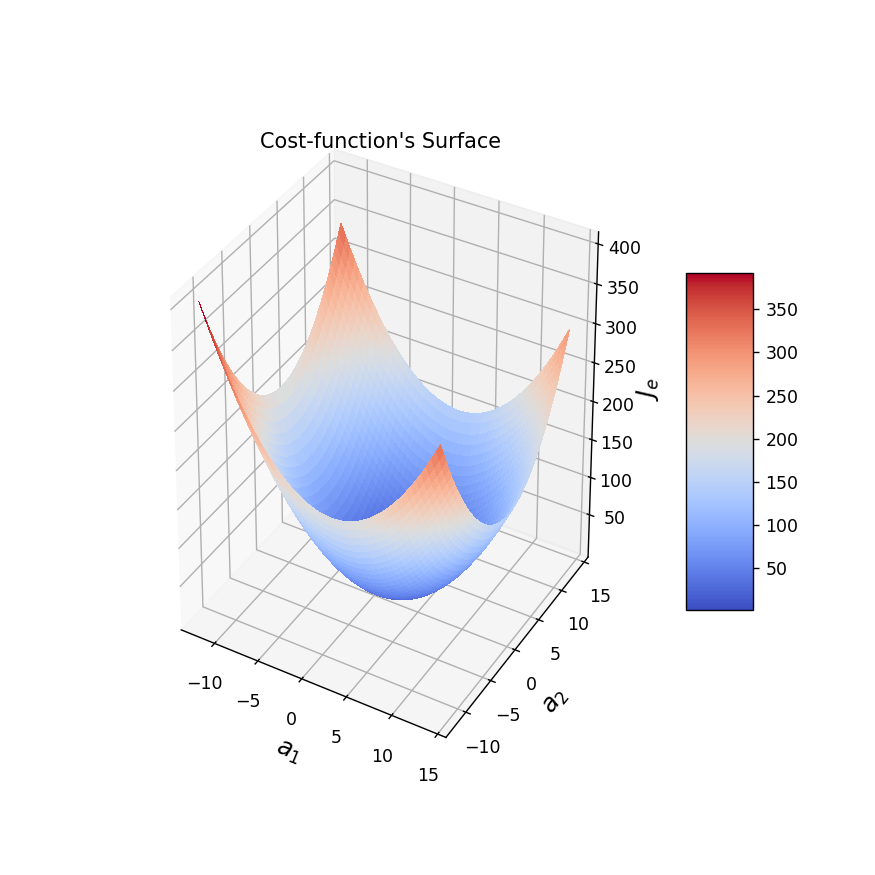

In [7]:
# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
#Show the plot.
plt.show()

plt.savefig("error_surface_sgd.png", dpi=600)

<IPython.core.display.Javascript object>


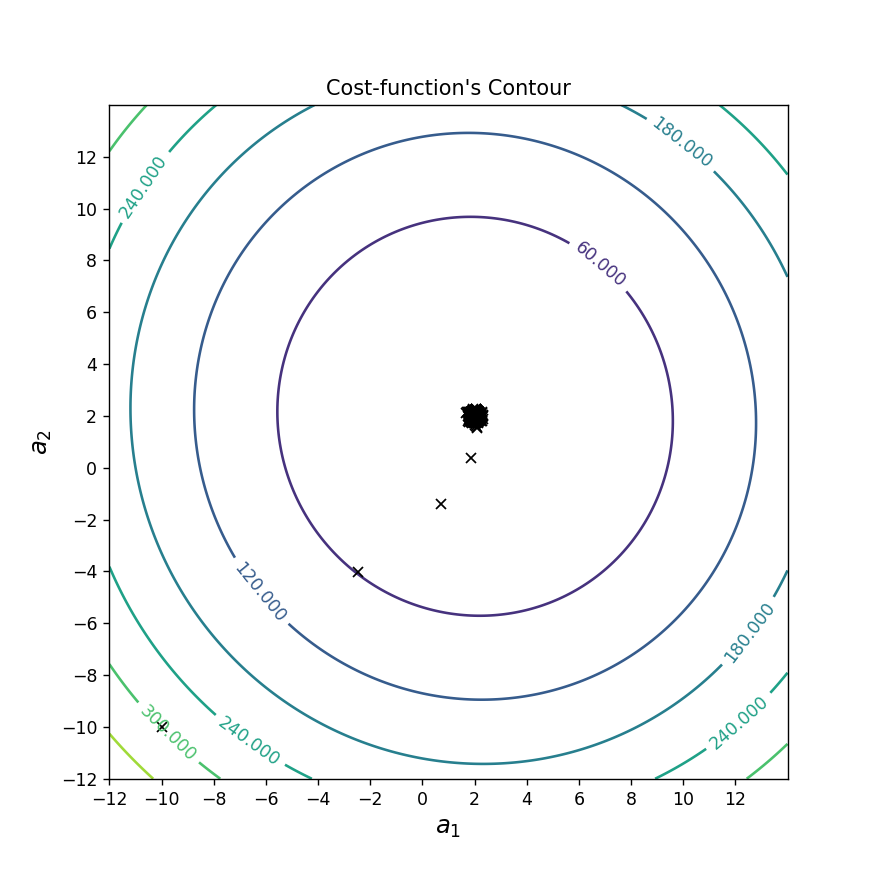

In [9]:
# Plot figure.        
fig = plt.figure(figsize=(7,7))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, 0:n_epochs], a_hist[1, 0:n_epochs], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
plt.show()

plt.savefig("error_contour_sgd.png", dpi=600)